<a href="https://colab.research.google.com/github/vacantu/Basic_student_Bio/blob/master/PredTmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Predice la temperatura de la Cd de México. Usa 2 meses de historia.

In [31]:
from google.colab import files
uploaded = files.upload()

Saving HistTemp_CdMx.csv to HistTemp_CdMx (2).csv


In [32]:
import pandas as pd

In [33]:
import io
datos_tmp = pd.read_csv(io.BytesIO(uploaded['HistTemp_CdMx.csv']))

In [34]:
datos_tmp

,Date,Avg
0,4.10,21
1,4.20,23
2,4.30,22
3,4.40,21
4,4.50,23
5,4.60,21
6,4.70,22
7,4.80,16
8,4.90,17
9,4.10,17


In [35]:
datos_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    56 non-null     float64
 1   Avg     56 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9516efd0d0>,
      dtype=object)

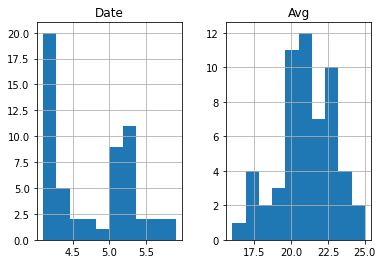

In [36]:
datos_tmp.hist()

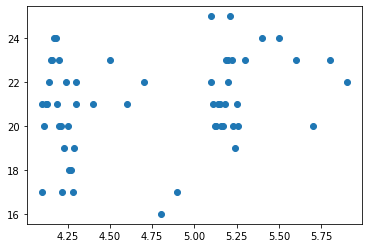

In [38]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_tmp["Date"],y=datos_tmp["Avg"])


In [39]:
training_data = datos_tmp.sample(frac=0.8,random_state=0)
test_data = datos_tmp.drop(training_data.index)

In [40]:
training_labels = training_data.pop('Avg')
test_labels = test_data.pop('Avg')

In [41]:
training_labels

45    20
33    24
40    21
26    18
11    21
2     22
32    23
43    21
46    20
30    22
4     23
10    20
28    19
22    19
31    22
49    23
37    23
7     16
14    23
27    17
35    23
50    25
18    21
52    20
34    24
15    23
5     21
29    21
16    24
54    21
20    20
48    23
8     17
13    22
25    18
17    24
41    20
55    20
38    22
1     23
12    21
42    20
24    20
6     22
23    22
Name: Avg, dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(training_data,training_labels)

LinearRegression()

In [65]:
predicciones = modelo.predict(test_data)
predicciones

array([20.67162009, 20.91632434, 20.67162009, 20.75318818, 20.76950179,
       21.9767094 , 21.48730091, 21.52808495, 21.55255537, 21.58518261,
       21.60149622])

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(test_labels,predicciones))
print('Error :  %f' % error)

Error :  2.215076


In [69]:
test_data

,Date
0,4.10
3,4.40
9,4.10
19,4.20
21,4.22
36,5.70
39,5.10
44,5.15
47,5.18
51,5.22


In [84]:
from google.colab import files
uploaded = files.upload()

Saving next_day.csv to next_day (1).csv


In [89]:
next_day = pd.read_csv(io.BytesIO(uploaded['next_day.csv']))
next_day

,Date
0,5.27


In [88]:
next_day_tmp = modelo.predict(next_day)
next_day_tmp

array([21.62596665])